In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
# check features & labels
x, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
circles = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "label": y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


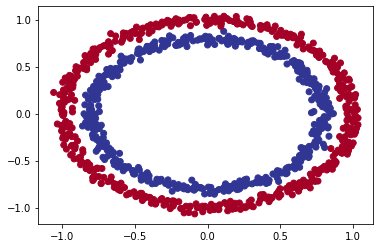

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, 
                                                    random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test)

(750, 250, 750, 250)

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 3s 2ms/step - loss: 0.6988 - accuracy: 0.5053
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5080
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.4840
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5187
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5013
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5000
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6467
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5733
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5293
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5680
Epoch 11/

Text(0.5, 0, 'epochs')

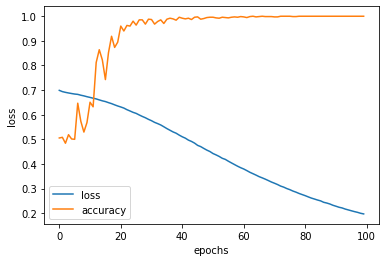

In [9]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 1.0000


[0.23355911672115326, 1.0]

In [12]:
y_pred = model.predict(x_test)

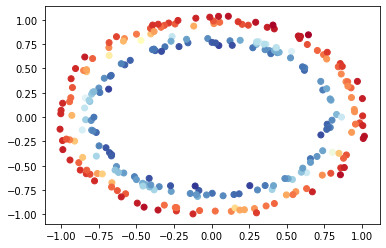

In [13]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap=plt.cm.RdYlBu)

In [14]:
def plot_decision_boundary(model, x, y):
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    y_pred = model.predict(x_in)
    
    # check for multiclass
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


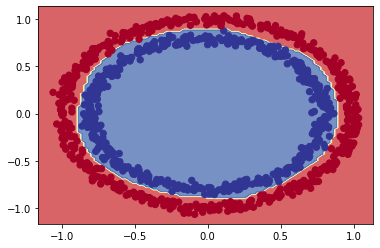

In [15]:
# check out predictions
plot_decision_boundary(model=model, x=x, y=y)

## Evaluationg and improving our model

In [16]:
len(x), x

(1000, array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_test.shape, y_train.shape

((800, 2), (200, 2), (200,), (800,))

In [18]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history_1 = model_1.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6087
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6087
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7788
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.8475
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.9525
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.9438
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9887
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9975
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9987
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9975
Epoch 11/25
25/25 [

Text(0.5, 0, 'epochs')

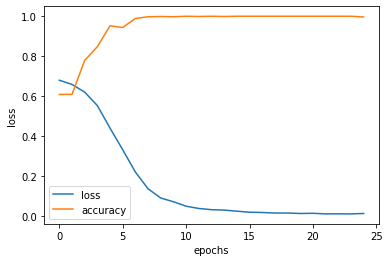

In [19]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [20]:
# Evaluate the model

model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9800


[0.05479538068175316, 0.9800000190734863]

doing binary classification
doing binary classification


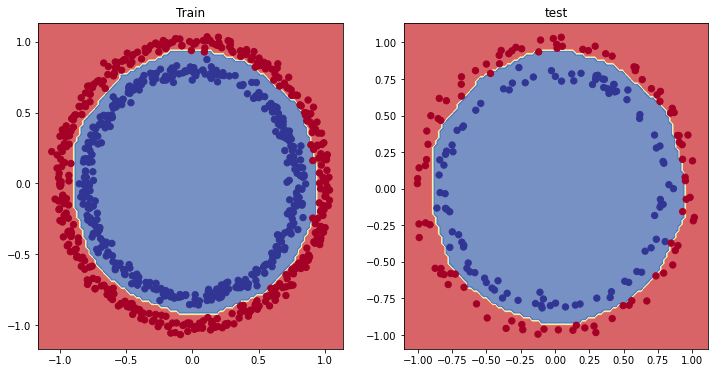

In [21]:
# Plot the decision boundries
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, x=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1, x=X_test, y=y_test)
           

## Finding the best learning rate

In [22]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_2 = model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5000
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5000
Epoch 11/

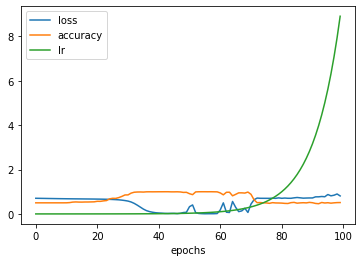

In [23]:
pd.DataFrame(history_2.history).plot(xlabel="epochs")

Text(0, 0.5, 'Loss')

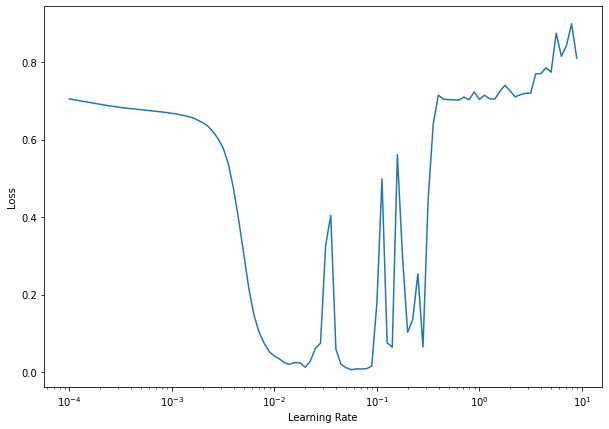

In [24]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [25]:
# Using Ideal learning rate

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5987
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.7175
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8825
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9762
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9887
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9962
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9987
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9987
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9987
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9950
Epoch 11/20
25/25 [

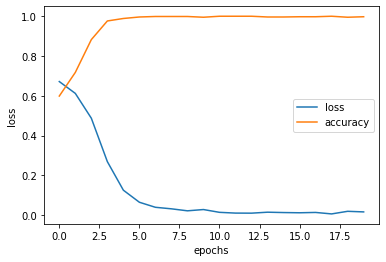

In [26]:
pd.DataFrame(history_3.history).plot(xlabel="epochs", ylabel="loss")

In [27]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9950


[0.020042480900883675, 0.9950000047683716]

doing binary classification
doing binary classification


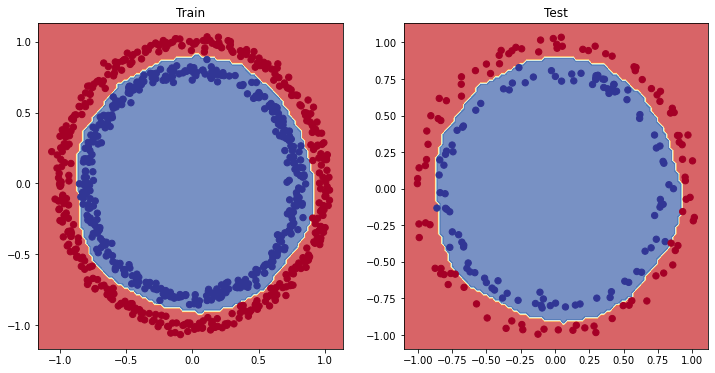

In [28]:
# Plot the decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, x=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, x=X_test, y=y_test)

 ## More classification evaluation methods
 
 * Accuracy
 * Precision
 * Recall
 * F1-Score
 * Confusion matrix
 * Classification report (from scikit-learn)

In [29]:
# Check the accuracy
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"loss: {loss:.2f}")
print(f"Accuracy: {(accuracy*100):.2f} %")

7/7 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9950
loss: 0.02
Accuracy: 99.50 %


In [30]:
# Create confusion matrix

from sklearn.metrics import confusion_matrix

y_preds = model_3.predict(X_test)

confusion_matrix(y_test, y_preds)

ValueError: ignored

In [31]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [32]:
y_preds[:10]

"""
predictions array has come out in Prediction probability form...
the standard output from sigmoid or softmax activation functions
"""

'\npredictions array has come out in Prediction probability form...\nthe standard output from sigmoid or softmax activation functions\n'

In [33]:
# Convert prediction probability to binary format

tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [34]:
# Create confusion matrix

confusion_matrix(y_test, tf.round(y_preds))

array([[100,   0],
       [  1,  99]])

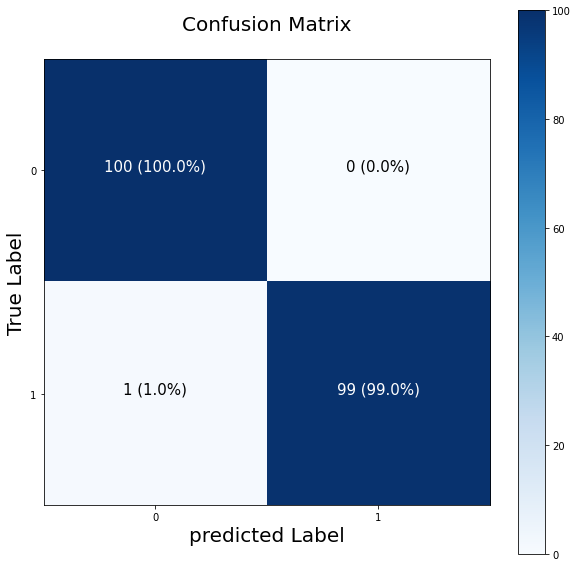

In [35]:
import itertools
    
figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axis
ax.set(title="Confusion Matrix",
      xlabel="predicted Label",
      ylabel="True Label",
      yticks=np.arange(n_classes),
      xticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15) 

In [36]:
n_classes

2

# Multiclass Classification

use for more than two classes

In [37]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [38]:
# show the first trainding data
print(f"Training Example:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training Example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [39]:
# check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

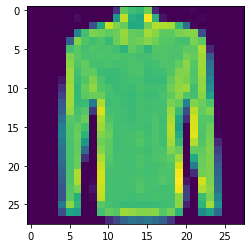

In [40]:
# Plot a single sample
plt.imshow(train_data[40])

In [41]:
# Create a small list for training labels
classs_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'T-shirt/top')

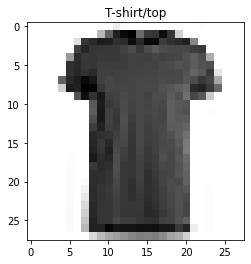

In [42]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(classs_names[train_labels[17]])

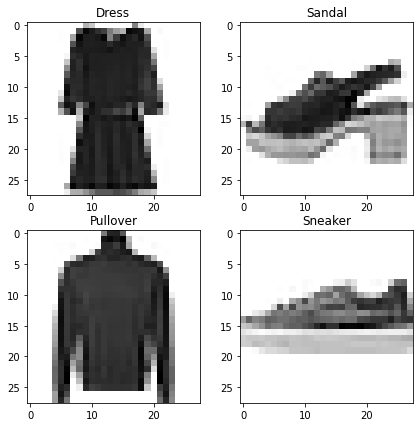

In [43]:
# Plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(classs_names[train_labels[rand_index]])

## Building  a model

In [57]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_11.fit(train_data, train_labels, 
             epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3731 - accuracy: 0.5940 - val_loss: 1.1634 - val_accuracy: 0.5492
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0237 - accuracy: 0.5844 - val_loss: 1.0217 - val_accuracy: 0.5558
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0007 - accuracy: 0.5741 - val_loss: 0.9894 - val_accuracy: 0.5586
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9516 - accuracy: 0.6022 - val_loss: 0.8677 - val_accuracy: 0.6733
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8194 - accuracy: 0.6598 - val_loss: 0.7816 - val_accuracy: 0.6764
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7125 - accuracy: 0.7191 - val_loss: 0.6742 - val_accuracy: 0.7525
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5707 - accuracy: 0.8055 - val_loss: 0.6134 - val_accuracy:

In [45]:
# Check the model summary
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Check the min and max value of training data
train_data.min(), train_data.max()

(0, 255)

In [48]:
# normalizing data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [55]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
             train_labels,
             epochs=10,
             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4736 - accuracy: 0.8293 - val_loss: 0.3895 - val_accuracy: 0.8582
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3566 - accuracy: 0.8698 - val_loss: 0.4211 - val_accuracy: 0.8537
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3222 - accuracy: 0.8807 - val_loss: 0.4009 - val_accuracy: 0.8500
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.8898 - val_loss: 0.3566 - val_accuracy: 0.8666
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8948 - val_loss: 0.3407 - val_accuracy: 0.8744
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2651 - accuracy: 0.8993 - val_loss: 0.3740 - val_accuracy: 0.8603
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2537 - accuracy: 0.9054 - val_loss: 0.3444 - val_accuracy:

Text(0.5, 1.0, 'Normalized Data')

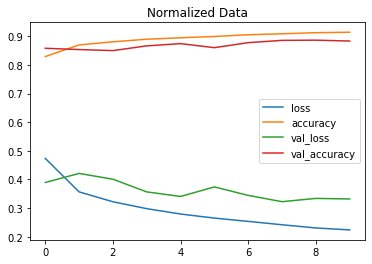

In [58]:
pd.DataFrame(norm_history.history).plot()
plt.title("Normalized Data")

Text(0.5, 1.0, 'Non-Normalized Data')

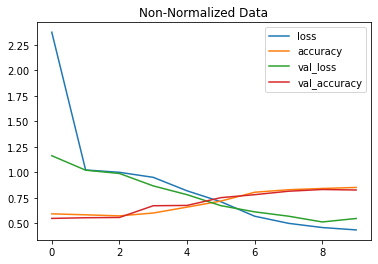

In [59]:
pd.DataFrame(history.history).plot()
plt.title("Non-Normalized Data")

## finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_callback]
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4730 - accuracy: 0.8288 - val_loss: 0.3935 - val_accuracy: 0.8563
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3633 - accuracy: 0.8653 - val_loss: 0.4280 - val_accuracy: 0.8531
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3327 - accuracy: 0.8768 - val_loss: 0.3792 - val_accuracy: 0.8604
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3138 - accuracy: 0.8852 - val_loss: 0.3780 - val_accuracy: 0.8602
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3009 - accuracy: 0.8883 - val_loss: 0.3670 - val_accuracy: 0.8680
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2896 - accuracy: 0.8905 - val_loss: 0.4070 - val_accuracy: 0.8509
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2875 - accuracy: 0.8932 - val_loss: 0.3684 - val_accuracy: